In [3]:
%config IPCompleter.greedy = True

import pymysql as psql

import pandas as pd
from pandas import *
from seaborn import *
from matplotlib.pyplot import *

import numpy as np
from statsmodels.formula.api import *
%matplotlib inline 

pd.options.display.max_columns = None
pd.options.display.max_seq_items = None
np.set_printoptions(threshold=np.inf)

In [4]:
# Conjunto de Dados com os Alunos Formados

conn=psql.connect(host="localhost", user="uffdata", passwd="uffdata123", db="dwebd152")
df = read_sql('SELECT * from BI_DMALUNO WHERE CODSITUACAOALUNO=0 && (CODSTATUSALUNO=8 || CODSTATUSALUNO=21);', conn)
print('Números de registros:', len(df))
conn.close()

Números de registros: 5738


In [5]:
df.all

<bound method DataFrame.all of            IDALUNO    CR  CODCURSO  ANOINGRESSO  SEMESTREINGRESSO  \
0           150957  7.90        36         2005                 1   
1           150960  7.39        36         2005                 1   
2           150966  8.06        47         2005                 2   
3           150968  7.80        47         2005                 1   
4           150972  8.17        48         2005                 1   
5           150973  8.71        48         2005                 1   
6           150975  8.73        48         2005                 1   
7           150979  8.49        48         2005                 1   
8           150980  8.78        48         2005                 1   
9           150981  8.42        48         2005                 1   
10          150982  8.02        48         2005                 1   
11          150984  8.28        48         2005                 1   
12          150985  8.51        48         2005                 1   
13 

In [6]:
# Apresentação do Dataframe

df.head(20)

,IDALUNO,CR,CODCURSO,ANOINGRESSO,SEMESTREINGRESSO,DATANASCIMENTO,ATIVO,COR,ANODESVINCULACAO,SEMESTREDESVINCULACAO,BAIRRO,CEP,CIDADE,ESTADOCIVEL,IDENTIDADEESTRANGEIRA,PERMANENCIADEVINCULO,SEXO,FATORRH,NATURALIDADEESTRANGEIRA,CURSOORIGEM,SEMESTRETRANCAMENTO,ANOTRANCAMENTO,ACAODEORIGEM,ACAODEINGRESSO,CODSTATUSALUNO,CODSITUACAOALUNO,CARGAHORARIACURSADA
0,150957,7.90,36,2005,1,01/04/1984,1.0,PARDA,2009.0,1.0,CENTRO,29460000,BOM JESUS DO NORTE,SOLTEIRO(A),NaN,0.0,F,None,None,None,NaN,NaN,None,None,8,0,3398
1,150960,7.39,36,2005,1,20/11/1986,1.0,None,2009.0,1.0,CEHAB,28300000,ITAPERUNA,SOLTEIRO(A),NaN,0.0,F,None,None,None,NaN,NaN,None,None,8,0,3398
2,150966,8.06,47,2005,2,08/01/1985,1.0,None,2009.0,2.0,INGA,24210110,NITERÓI,SOLTEIRO(A),NaN,0.0,F,None,None,None,NaN,NaN,None,None,8,0,3360
3,150968,7.80,47,2005,1,17/10/1981,1.0,BRANCA,2009.0,2.0,ICARAI,24220261,NITERÓI,SOLTEIRO(A),NaN,0.0,M,None,None,None,NaN,NaN,None,None,8,0,3440
4,150972,8.17,48,2005,1,02/09/1984,1.0,BRANCA,2008.0,2.0,CENTRO,25510400,SÃO JOÃO DE MERITI,SOLTEIRO(A),NaN,0.0,M,None,None,None,NaN,NaN,None,None,8,0,4020
5,150973,8.71,48,2005,1,13/09/1985,1.0,BRANCA,2008.0,2.0,LARANJAL,27253390,VOLTA REDONDA,SOLTEIRO(A),NaN,0.0,M,POSITIVO,None,None,NaN,NaN,None,None,8,0,4110
6,150975,8.73,48,2005,1,18/06/1987,0.0,BRANCA,2008.0,2.0,SAO DOMINGOS,24020006,NITERÓI,SOLTEIRO(A),NaN,0.0,F,None,None,None,NaN,NaN,None,None,8,0,4100
7,150979,8.49,48,2005,1,25/11/1986,1.0,None,2008.0,2.0,SAO DOMINGOS,24210001,NITERÓI,SOLTEIRO(A),NaN,0.0,F,None,None,None,NaN,NaN,None,None,8,0,4060
8,150980,8.78,48,2005,1,08/09/1985,1.0,BRANCA,2008.0,2.0,ENGENHO NOVO,20715004,RIO DE JANEIRO,SOLTEIRO(A),NaN,0.0,F,None,None,None,NaN,NaN,None,None,8,0,4135
9,150981,8.42,48,2005,1,26/07/1987,1.0,BRANCA,2009.0,1.0,ITAIPU,24355233,NITERÓI,SOLTEIRO(A),NaN,0.0,F,None,None,None,NaN,NaN,None,None,8,0,4135


In [7]:
# Descrição do Dataframe com Número de registros e Colunas

df.shape




(5738, 27)

In [8]:
df.columns

Index(['IDALUNO', 'CR', 'CODCURSO', 'ANOINGRESSO', 'SEMESTREINGRESSO',
       'DATANASCIMENTO', 'ATIVO', 'COR', 'ANODESVINCULACAO',
       'SEMESTREDESVINCULACAO', 'BAIRRO', 'CEP', 'CIDADE', 'ESTADOCIVEL',
       'IDENTIDADEESTRANGEIRA', 'PERMANENCIADEVINCULO', 'SEXO', 'FATORRH',
       'NATURALIDADEESTRANGEIRA', 'CURSOORIGEM', 'SEMESTRETRANCAMENTO',
       'ANOTRANCAMENTO', 'ACAODEORIGEM', 'ACAODEINGRESSO', 'CODSTATUSALUNO',
       'CODSITUACAOALUNO', 'CARGAHORARIACURSADA'],
      dtype='object')

In [9]:
# Distribuição dos Valores de Coeficiente de Rendimento dos alunos formados.

df.CR.values

array([  7.9 ,   7.39,   8.06,   7.8 ,   8.17,   8.71,   8.73,   8.49,
         8.78,   8.42,   8.02,   8.28,   8.51,   8.57,   8.51,   7.7 ,
         7.64,   8.29,   8.05,   8.51,   8.31,   8.83,   7.  ,   7.3 ,
         7.48,   7.71,   7.6 ,   8.1 ,   8.66,   7.87,   8.01,   7.64,
         8.05,   8.01,   8.82,   8.44,   8.63,   7.17,   7.57,   8.92,
         6.59,   8.15,   7.53,   8.37,   8.59,   7.92,   8.42,   9.18,
         6.65,   7.58,   8.24,   7.96,   6.09,   6.35,   6.98,   8.82,
         7.64,   7.83,   7.54,   7.91,   8.55,   7.44,   8.14,   7.74,
         7.49,   8.96,   8.22,   8.74,   8.33,   8.5 ,   7.33,   8.51,
         8.55,   7.25,   8.65,   7.71,   8.32,   7.91,   8.93,   8.34,
         7.88,   6.51,   5.61,   7.51,   7.84,   7.6 ,   8.6 ,   8.07,
         8.27,   8.23,   8.31,   8.84,   8.24,   7.87,   7.99,   8.71,
         8.26,   7.81,   7.68,   8.28,   7.05,   8.77,   7.34,   7.71,
         8.07,   7.55,   7.37,   8.25,   7.54,   6.98,   8.15,   8.18,
      

In [10]:
# Avaliação descritiva com o resumo de tendência central, dispersão e a distribuição do dataset.

df.CR.describe().round(2)

count    5738.00
mean        7.89
std         1.04
min         0.00
25%         7.40
50%         8.11
75%         8.62
max        10.00
Name: CR, dtype: float64

In [11]:
# O CR Médio dos Alunos formados

round(df.CR.mean(), 2)

7.89

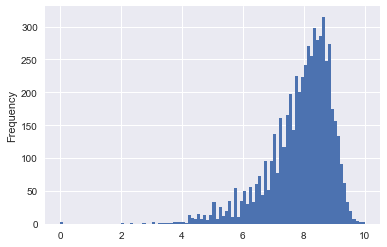

In [12]:
# Construção de Gráficos com base no COEFICIENTE DE RENDIMENTO

# df.CR.plot.hist(bins=100);

df.CR.plot.hist(bins=100);


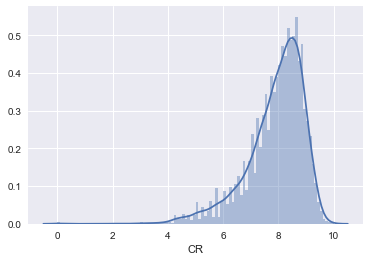

In [13]:
distplot(df.CR, hist=True,bins=100);

In [14]:
tdf = df.CODCURSO.values

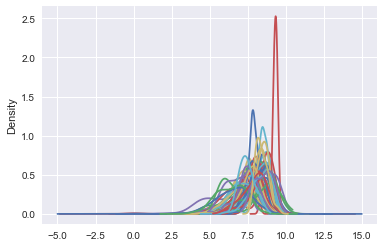

In [15]:

# Criação de gráficos de Densidade por Curso (Sobreposto)
np.unique(tdf)

for i in np.unique(tdf): 
    dfcurso = df[df.CODCURSO == i] 
    try:
        dfcurso.CR.plot.density()
    except:
        []

   


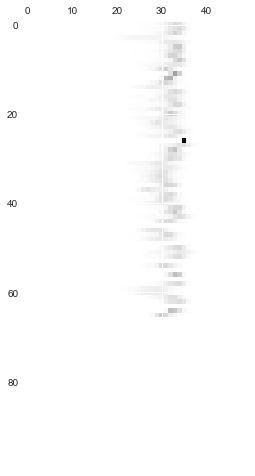

In [16]:
# Criação de gráficos 2D de Densidade por Curso (Sobreposto)     
import scipy.stats as stats

matCurso = np.zeros((100,50))

for i,it in enumerate( np.unique(tdf)):
    try:
        dfcurso = df[df.CODCURSO == it] 
        nparam_density = stats.kde.gaussian_kde(dfcurso.CR.values.ravel())
        x = np.linspace(-5, 15, 50)
        y = nparam_density(x)
        matCurso[i,:] = y
    except:[]
        
matshow(matCurso)




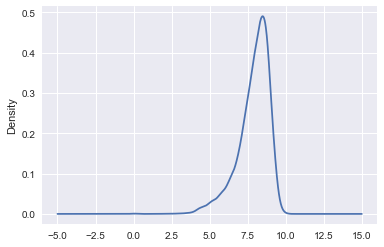

In [17]:
# Construção de Gráficos

df.CR.plot.density();

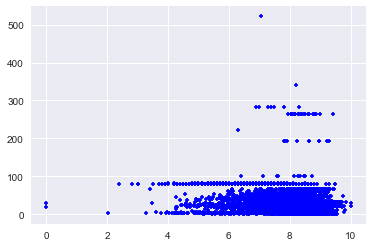

In [18]:
scatter(df.CR, df.CODCURSO, s=10, c='blue', marker='+', data=df);



In [19]:
df.groupby('SEXO').CR.describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,3577.0,8.083344,0.896999,0.0,7.67,8.27,8.71,10.0
M,2161.0,7.557404,1.180924,0.0,6.96,7.79,8.40,10.0


In [20]:
df.groupby("SEXO").COR.describe()

,count,unique,top,freq
SEXO,,,,
F,2407,6,BRANCA,1817
M,1303,6,BRANCA,994


In [21]:
dir(df)

['ACAODEINGRESSO',
 'ACAODEORIGEM',
 'ANODESVINCULACAO',
 'ANOINGRESSO',
 'ANOTRANCAMENTO',
 'ATIVO',
 'BAIRRO',
 'CARGAHORARIACURSADA',
 'CEP',
 'CIDADE',
 'CODCURSO',
 'CODSITUACAOALUNO',
 'CODSTATUSALUNO',
 'COR',
 'CR',
 'CURSOORIGEM',
 'DATANASCIMENTO',
 'ESTADOCIVEL',
 'FATORRH',
 'IDALUNO',
 'IDENTIDADEESTRANGEIRA',
 'NATURALIDADEESTRANGEIRA',
 'PERMANENCIADEVINCULO',
 'SEMESTREDESVINCULACAO',
 'SEMESTREINGRESSO',
 'SEMESTRETRANCAMENTO',
 'SEXO',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__ha

In [22]:
dir()

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Categorical',
 'CategoricalIndex',
 'Circle',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'FacetGrid',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'Float64Index',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'GridSpec',
 'Grouper',
 'HDFStore',
 'In',
 'Index',
 'IndexLocator',
 'IndexSlice',
 'Int64Index',
 'Interval',
 'IntervalIndex',
 'JointGrid',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'Logit',
 'MNLogit',
 'MaxNLocator',
 'MixedLM',
 'MultiIndex',
 'MultipleLocator',
 'NaT',
 'NegativeBinomial',
 'NominalGEE',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'OLS',
 'OrdinalGEE',
 'Out',
 'PHReg',
 'PairGrid',
 'Panel',
 'Panel4D',
 'Period',
 'PeriodIndex',
 'Poisson',
 'PolarAxes',
 'Polygon',
 'Probit',
 'Quant